Exercise 1 - From the data itself, it might be appropriate to do linear regression but linearity should not be assumed in this case. They are able to fit a line to the data, but the data itself does not look linear. Based off of the scatterplot, there seems to be a bit of clustering at both the earlier and later timepoints, but not much in the middle (150-200 months as a taxi driver). If assuming linearity, it can weaken the interpretation of the data because it assumes an incremental change in taxi driver experience leads to an incremental change in hippocampal volume, whereas this may not be the case with plasticity. Early changes may be rapid and then there may be some ceiling effect for example. Therefore, if this is the case or the data is more skewed which would change the assumed linearity, then the underlying statistical outputs like p-values or CIs may not be reliable and lead to potential errors there.

Exercise 1 (follow up study): You can not definitively assume causality with this study. Any study like this has these limitations but the follow up study showing effect only for taxi drivers and not bus drivers matches the proposed mechanism being spatial learning in the posterior hippocampus. There is a positive correlation showing more years trained with higher hippocampal volume, which doesnt seem binary in this case. Along with these strengths, the replicability of this data from the first to the follow up study. The weaknesses of a study like this are that there may be some selection bias, it may be that these taxi drivers already have a higher baseline hippocampus in some instances. The sample size is also smaller so this could mean lower statistical power.

Exercise 2: I think their n is too small to make any generalizations. For linear regression, you would only have 1 degree of freedom, essentially no reliable estimate of residual variance. Again, any statistical outputs would be prone to errors and unreliable. From this regression, they can only make very weak claims. Their confidence intervals would look very wide with a very small n and a very high standard error. Yes you can test to see if the 2 regression lines are the same by fitting a single model to the pooled data with an interaction test. The H0 in this case would be that the interaction coefficient would be 0, that the slopes are equal across groups.

Exercise 2 (figure 2): The take home message is that earlier musical experience is associated with stronger neurophysiological responses to tones/notes. It could be okay to treat both sets of musicians as one group but only under certain assumptions, if the groups have the same slope and intercept (no interaction). In this case, I would have to assume linearity, homoscedasity, and no interaction. Qualitatively, I would first visually plot the data followed by an ANCOVA model, model comparison, and diagnostics to check residuals and outliers. I would definitely still report regressions separately for transparency and to justify pooled regression if interaction was not shown.

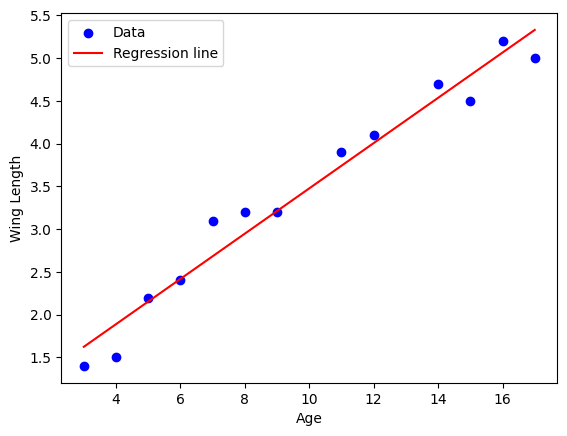

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           3.01e-09
Time:                        03:30:22   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

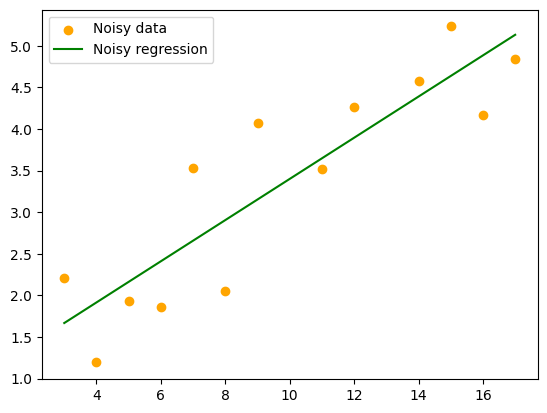

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Data
age = np.array([3,4,5,6,7,8,9,11,12,14,15,16,17])
wing = np.array([1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0])

# Scatter plot
plt.scatter(age, wing, color="blue", label="Data")
plt.xlabel("Age")
plt.ylabel("Wing Length")

# Regression (OLS)
X = sm.add_constant(age)  # adds intercept
model = sm.OLS(wing, X).fit()
intercept, slope = model.params

# Regression line
plt.plot(age, intercept + slope*age, color="red", label="Regression line")
plt.legend()
plt.show()

# Regression summary
print(model.summary())

# Pearson's r
r, pval = stats.pearsonr(age, wing)
print(f"Pearson r = {r:.3f}, p = {pval:.3e}")

# Add noise and redo regression
np.random.seed(1)
wing_noisy = wing + np.random.normal(0, 0.5, len(wing))

plt.scatter(age, wing_noisy, color="orange", label="Noisy data")
model_noisy = sm.OLS(wing_noisy, X).fit()
plt.plot(age, model_noisy.params[0] + model_noisy.params[1]*age, color="green", label="Noisy regression")
plt.legend()
plt.show()
